In [45]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
from string import punctuation
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katpve01\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katpve01\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [46]:
mainurl = urlopen('http://www.theguardian.com/profile/sidlowe').read()

In [47]:
soup = BeautifulSoup(mainurl)

C:\Users\katpve01\Continuum\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\katpve01\Continuum\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [48]:
anchortags = soup.find_all('a')

In [49]:
players = ['Lionel Messi','Cristiano Ronaldo','Luis Suarez','Arjen Robben','Neymar','Manuel Neuer','Eden Hazard',
             'Paul Pogba','James Rodriguez','Sergio Aguero','Alexis Sanchez','Gareth Bale','Gareth Bale','Sergio Busquets',
             'Thomas Muller','Andres Iniesta','Luka Modric','Gerard Pique','Philip Lahm','Javier Mascherano',
             'Diego Godin','Toni Kroos','Arturo Vidal','Karim Benzema','Zlatan Ibrahimovic','Gianluigi Buffon',
             'Marco Reus','Kevin de Bruyne','David de Gea','Robert Lewandowski','Diego Costa','Thibaut Courtois',
             'Thiago Silva','Sergio Ramos','Ivan Rakitic','Mesut Ozil','Angel di Maria','David Silva','Cesc Fabregas',
             'Dani Alves','Carlos Tevez','Isco','Antoine Griezmann','Jerome Boateng','Wayne Ronney','Mario Gotze',
          'Mats Hummels','David alaba','Nemanja Matic','Ricardo Rodriguez','Koke']

In [50]:
teams=['Barcelona','Real Madrid','Atletico Madrid','Villarreal','Athletic','Celta Vigo','Sevilla','Malaga',
          'Real Sociedad','Betis','Laspalmas','Valencia','Espanyol','Eibar','Deportivo','Granada','Sporting De Guon','Rayo Vallecano','Getafo','Levante']

In [51]:
dictPlayerCount = {}

dictTeamCount= {}

In [52]:
def getPlayersStagging(players):
    
    players_stagging = []
    for player in players:
        if len(player.split()) > 1:
            players_stagging.append(player.split()[1])
        else:
            players_stagging.append(player)
    return list(set([x.lower() for x in players_stagging]))

In [53]:
def getTeams(teams):
    teams_name = []
    for team in teams:
        if len(team.split()) > 1:
            teams_name.append(team.split()[1])
        else:
            teams_name.append(team)
    return list(set([x.lower() for x in teams_name]))

In [54]:
def strip_punctuation(s):
      return ''.join(c for c in s if c not in punctuation)

In [55]:
def getPlayersList(anchorTag, index):
    url = urlopen(anchorTag[index].get("href"))
    content = url.read()
    soup = BeautifulSoup(content, "lxml")
    htmlsource = soup.get_text().lower()
    filteredPunctuation = strip_punctuation(htmlsource)
    filtered_words = [word for word in filteredPunctuation.split() if word not in stopwords.words('english')]
    return filtered_words

In [56]:
def populatePlayersDict(commonPlayersList):
    for player in commonPlayersList:
        if player in dictPlayerCount:
            dictPlayerCount[player] += 1
        else:
            dictPlayerCount[player] = 1

In [57]:
def populateTeamDict(commonTeamList):
    for team in commonTeamList:
        if team in dictTeamCount:
            dictTeamCount[team] += 1
        else:
            dictTeamCount[team] = 1

In [58]:
players_stagging = getPlayersStagging(players)
team_stagging=getTeams(teams)

In [63]:
for i in range(1,0):
    playersList = getPlayersList(anchortags, i)
    commonPlayersList = [player for player in playersList if player in players_stagging]
    commonTeamList = [team for team in playersList if team in team_stagging]
    
    populatePlayersDict(commonPlayersList)
    populateTeamDict(commonTeamList)

print(dictPlayerCount)
print(dictTeamCount)

AttributeError: 'NoneType' object has no attribute 'timeout'

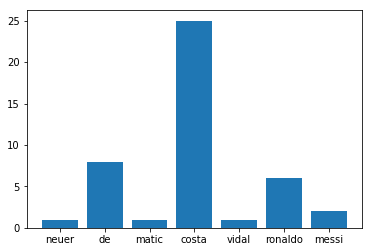

In [62]:
import matplotlib.pyplot as plt
plt.bar(range(len(dictPlayerCount)), dictPlayerCount.values(), align='center')
plt.xticks(range(len(dictPlayerCount)), dictPlayerCount.keys())
plt.show()